# Senior Thesis: Regime-dependent analysis of trend-following for commodity futures

## Import Data


In [1]:
import sys
sys.path.append('/Users/elliebae/Documents/Senior Thesis/senior-thesis-1/regime-detection')

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from regime_detection_tf import regime_detection_tf
from exploratory_data_analysis import financial_data

In [3]:
features = pd.read_csv("fed_monthly_data_2023_12.csv")
features.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,Transform:,5.000,5.0,5.000,5.0000,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.0,6.0,6.0000,1.0
1,1/1/1959,2583.560,2426.0,15.188,276676.8154,18235.77392,21.9665,23.3891,22.2688,31.7011,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
2,2/1/1959,2593.596,2434.8,15.346,278713.9773,18369.56308,22.3966,23.7048,22.4617,31.9337,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
3,3/1/1959,2610.396,2452.7,15.491,277775.2539,18523.05762,22.7193,23.8483,22.5719,31.9337,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
4,4/1/1959,2627.446,2470.0,15.435,283362.7075,18534.46600,23.2032,24.1927,22.9026,32.4374,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN


In [4]:
# Use yfinance to fetch data
ticker = "^SPGSCI"
start_date = "1991-05-01"
interval = "1mo"

spgsci = financial_data(ticker, start_date, interval)
spgsci_df = spgsci.preprocess_data()

[*********************100%%**********************]  1 of 1 completed


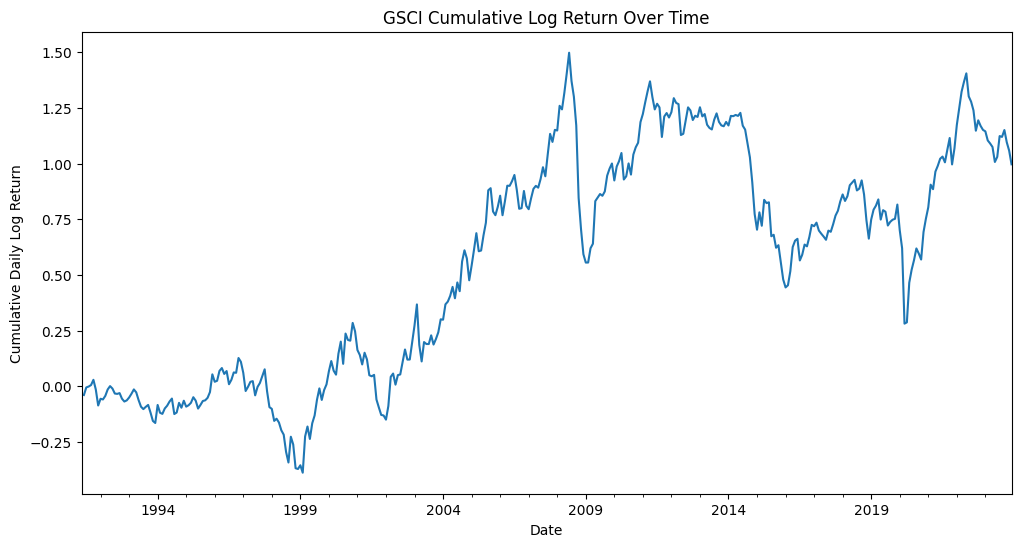

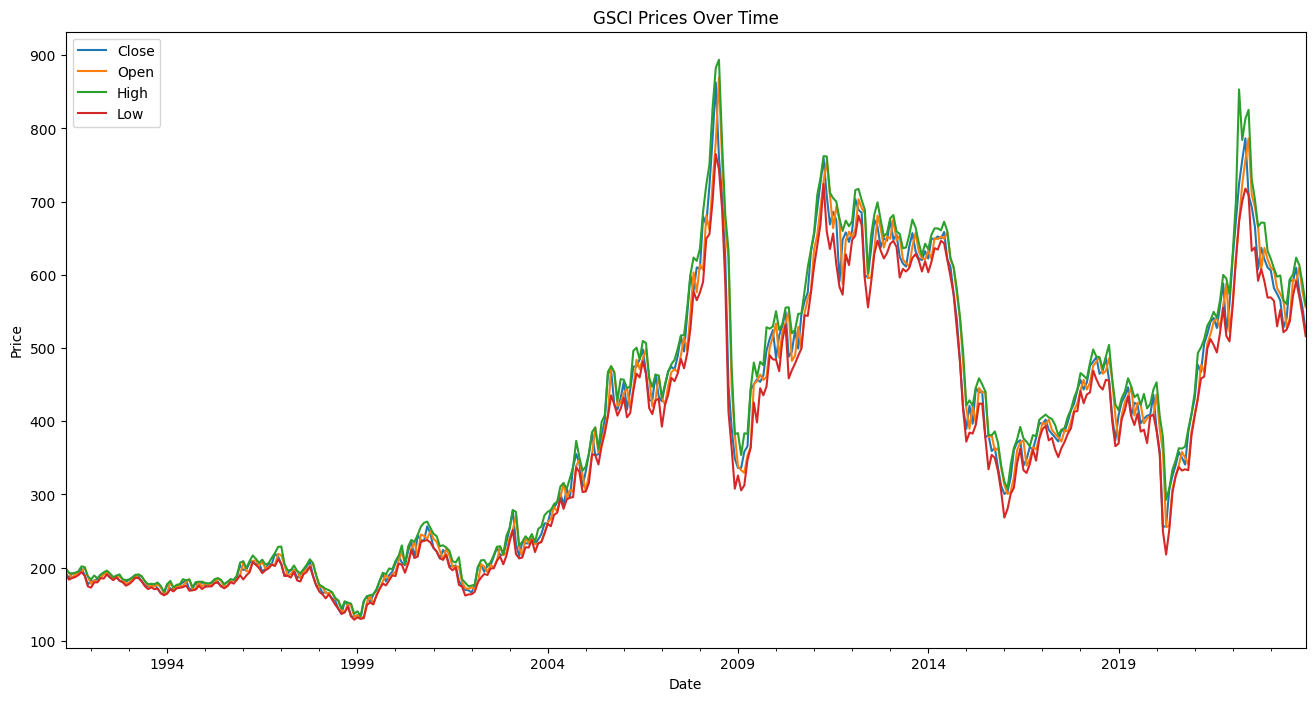

In [6]:
label = 'GSCI'
spgsci.plot_data(label)

In [4]:
# Use yfinance to fetch data
ticker = "DBC"
start_date = "2006-02-03"
interval = "1mo"

dbc = financial_data(ticker, start_date, interval)
dbc_df = dbc.preprocess_data()

[*********************100%%**********************]  1 of 1 completed


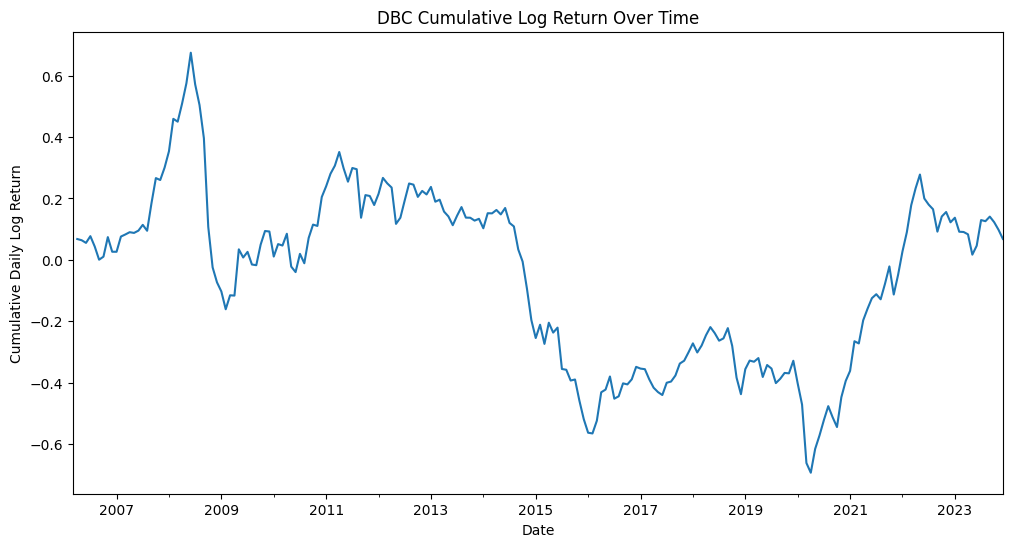

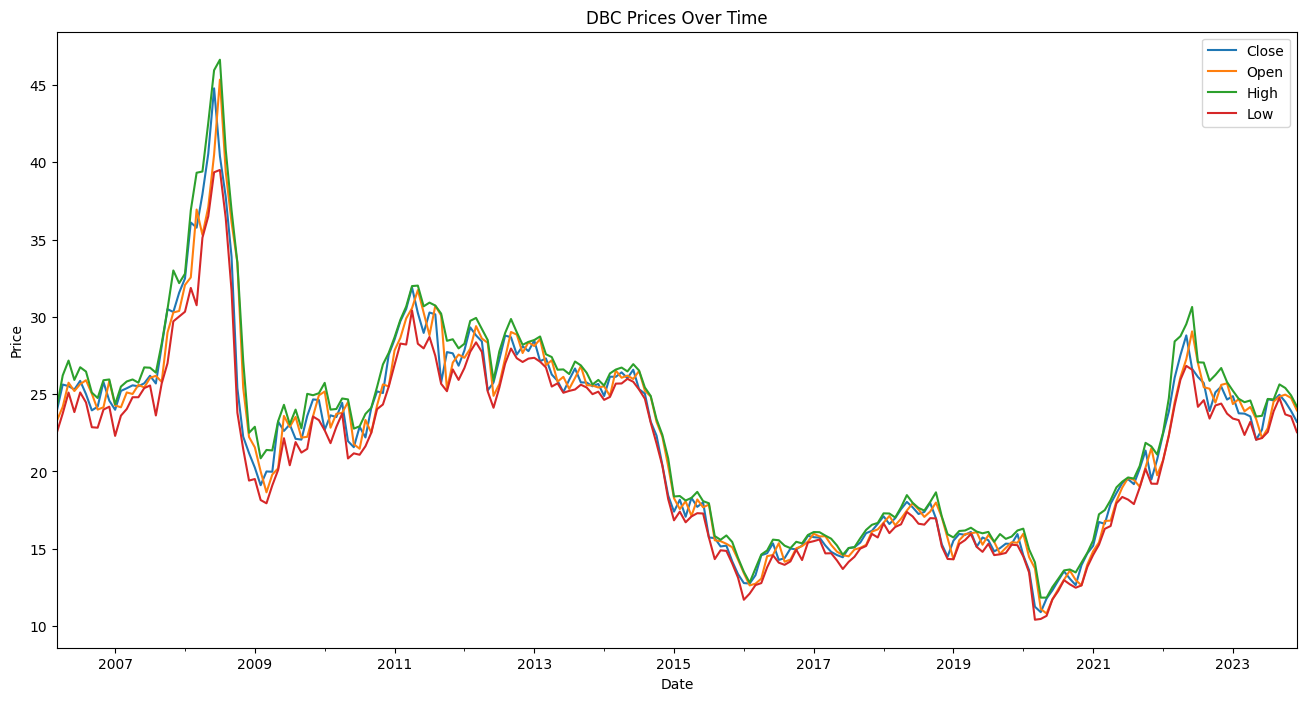

In [5]:
label = 'DBC'
dbc.plot_data(label)

In [6]:

# df = yf.download(ticker, start=start_date, interval=interval)

# # Check for Missing Values
# missing_values = df.isnull().sum()
# print(f"Missing values:\n{missing_values}")

# # Create Log Prices & Returns Columns
# df.index = pd.to_datetime(df.index, format="%Y-%m-%d")
# # Calculate daily returns and log returns
# df['Daily Return'] = df['Adj Close'].pct_change()
# df['Log Return'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
# df['Cumulative Log Return'] = np.cumsum(df['Log Return'])
# df.index = pd.to_datetime(df.index).round('D')

# # Data Inspection
# print(df.head())
# print(df.info())

## Regime Detection with Trend Filtering

In [6]:
# Separate out-of-sample data
sep_date = '2016-02-05'
# Smooth the Log Prices with Trend Filtering
lamda_vals = [0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32]
spgsci_regime = regime_detection_tf(spgsci, lamda_vals, sep_date)

NameError: name 'spgsci' is not defined

In [7]:
spgsci_df, gsci_regime_shifts = spgsci_regime.detect_regime(tuning=True)

I_n (391, 391)
D (389, 391)
lambda val 10.461036978443671


/Users/elliebae/Documents/Senior Thesis/senior-thesis-1/regime-detection/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


I_n (391, 391)
D (389, 391)
lambda val 10.461036978443671


/Users/elliebae/Documents/Senior Thesis/senior-thesis-1/regime-detection/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


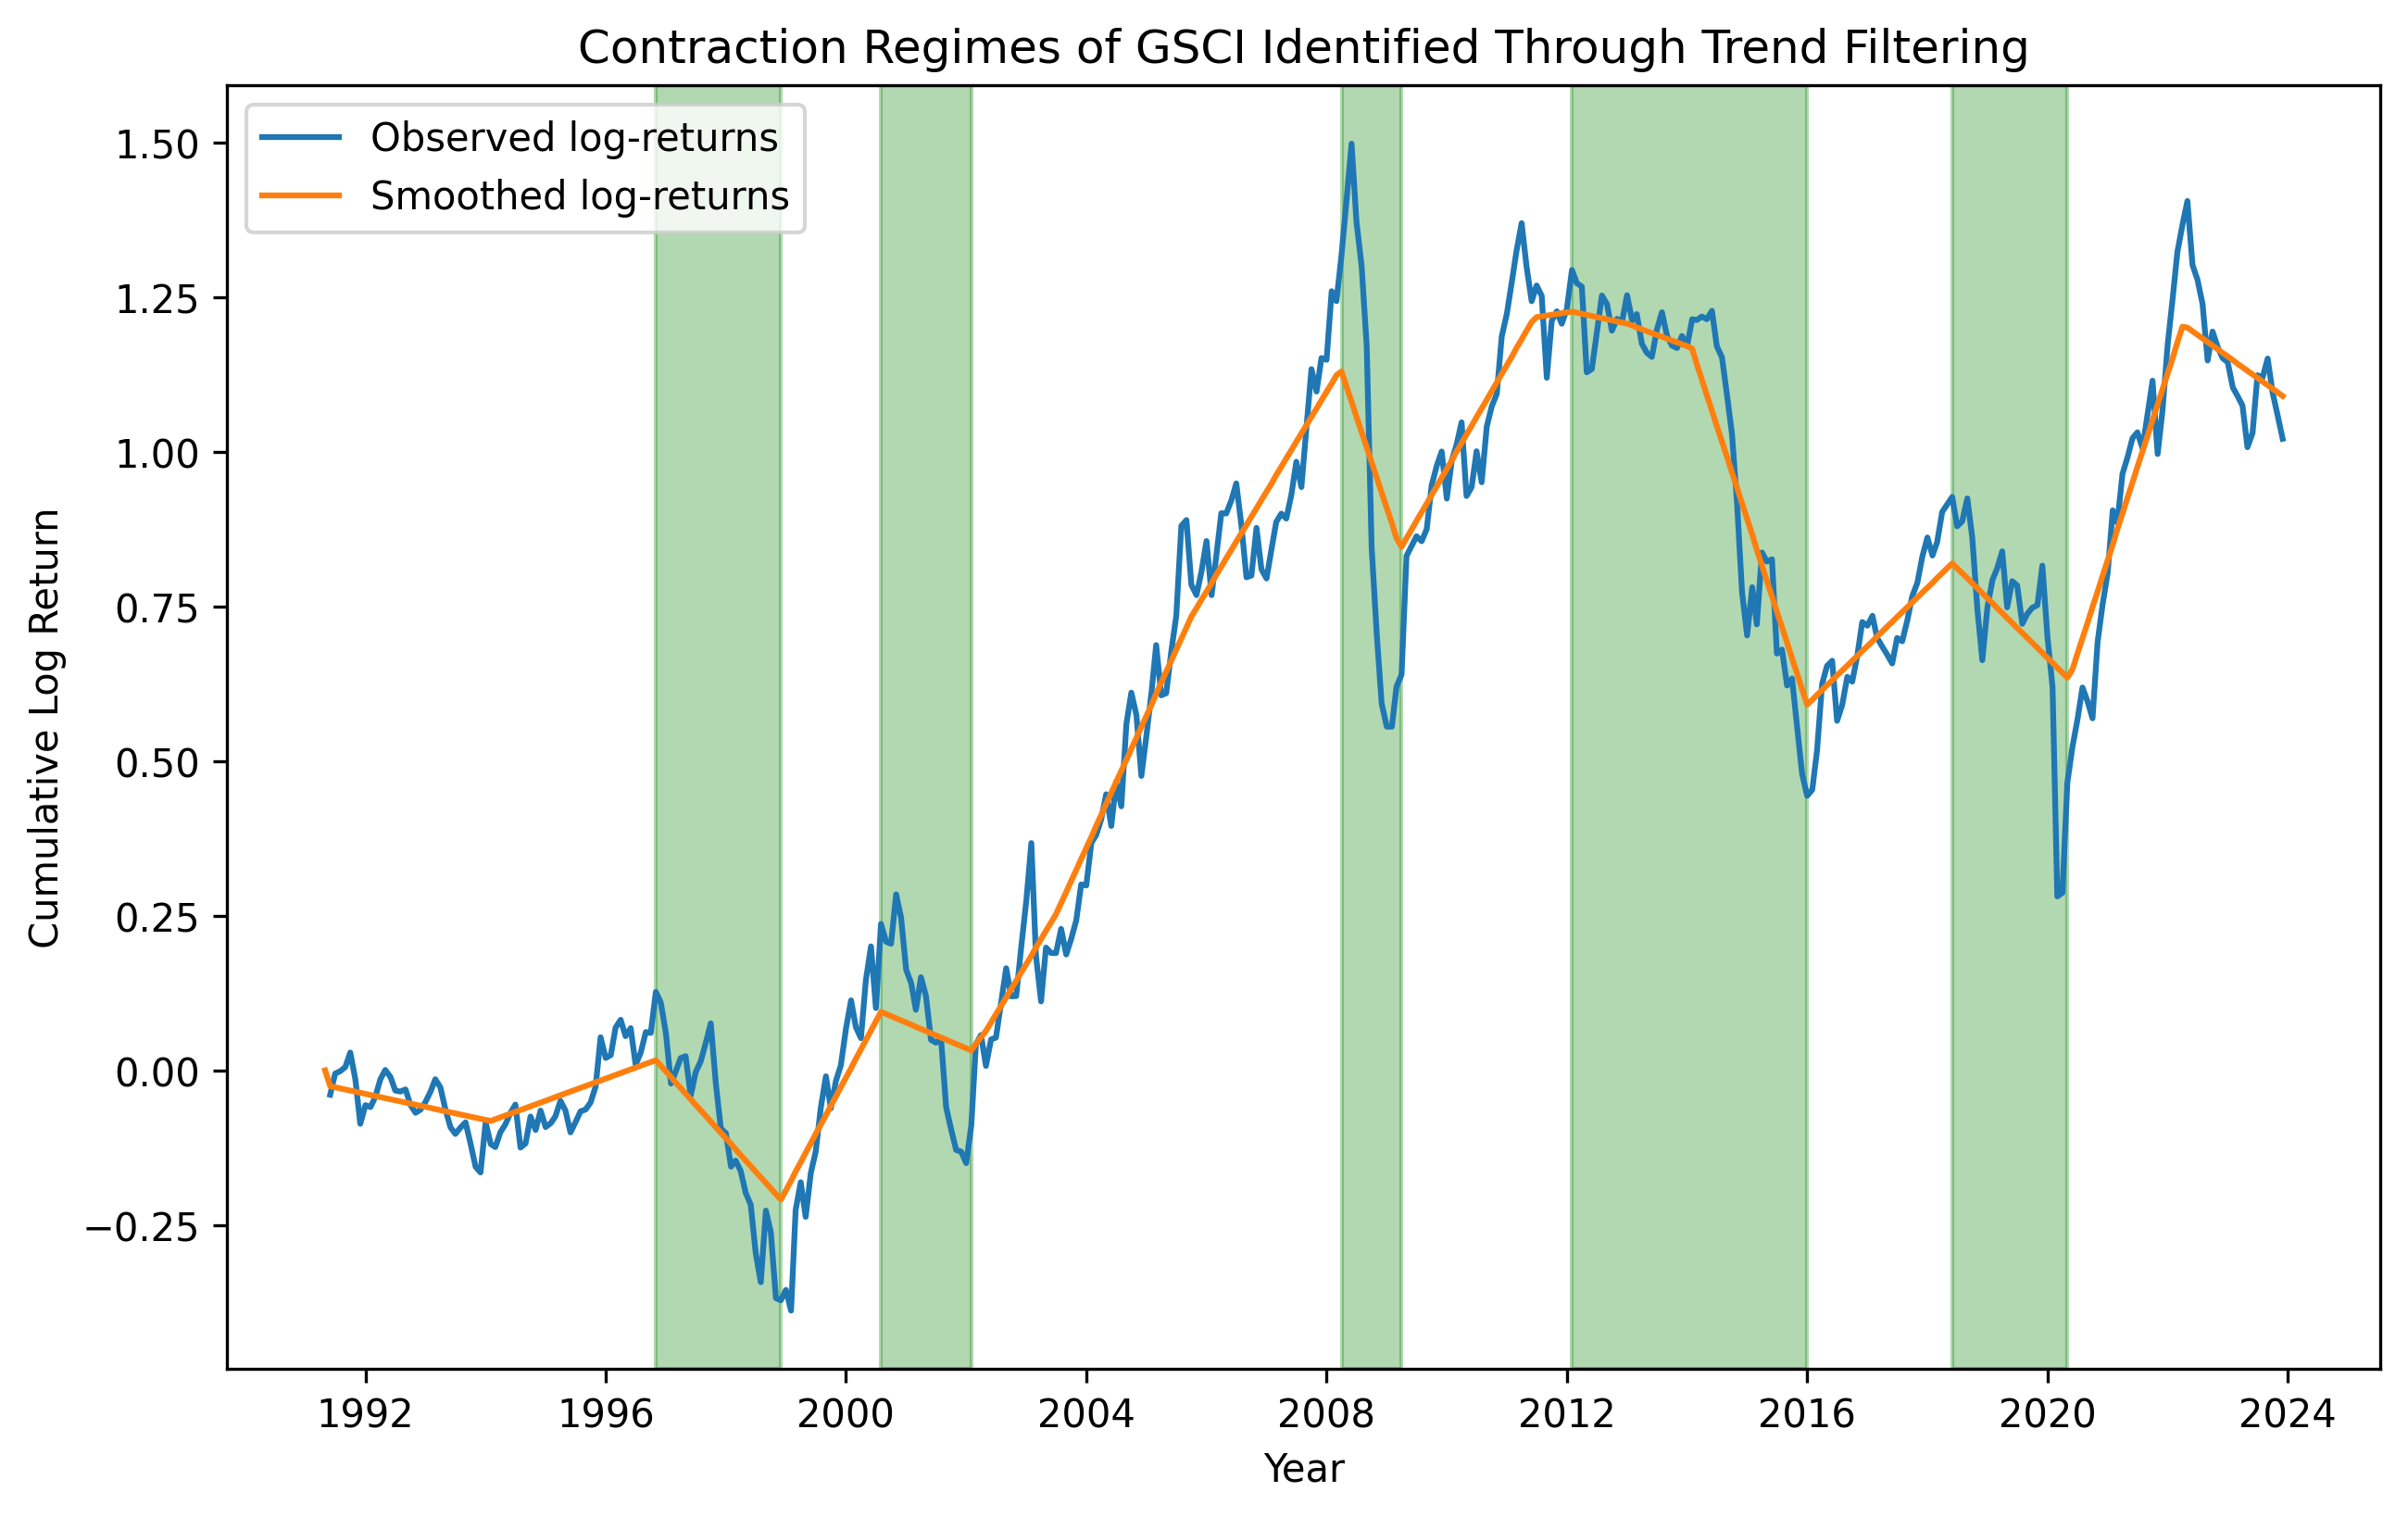

In [8]:
spgsci_regime.plot_best_lambda(tuning=True, label="GSCI")

/Users/elliebae/Documents/Senior Thesis/senior-thesis-1/regime_detection_tf.py:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  smoothed_train = smoothed_prices[train_index]


best lambda 0.04
best lambda 0.08
best lambda 0.08
best lambda 0.08
best lambda 0.08
best lambda 0.08
best lambda 0.08
best lambda 0.08


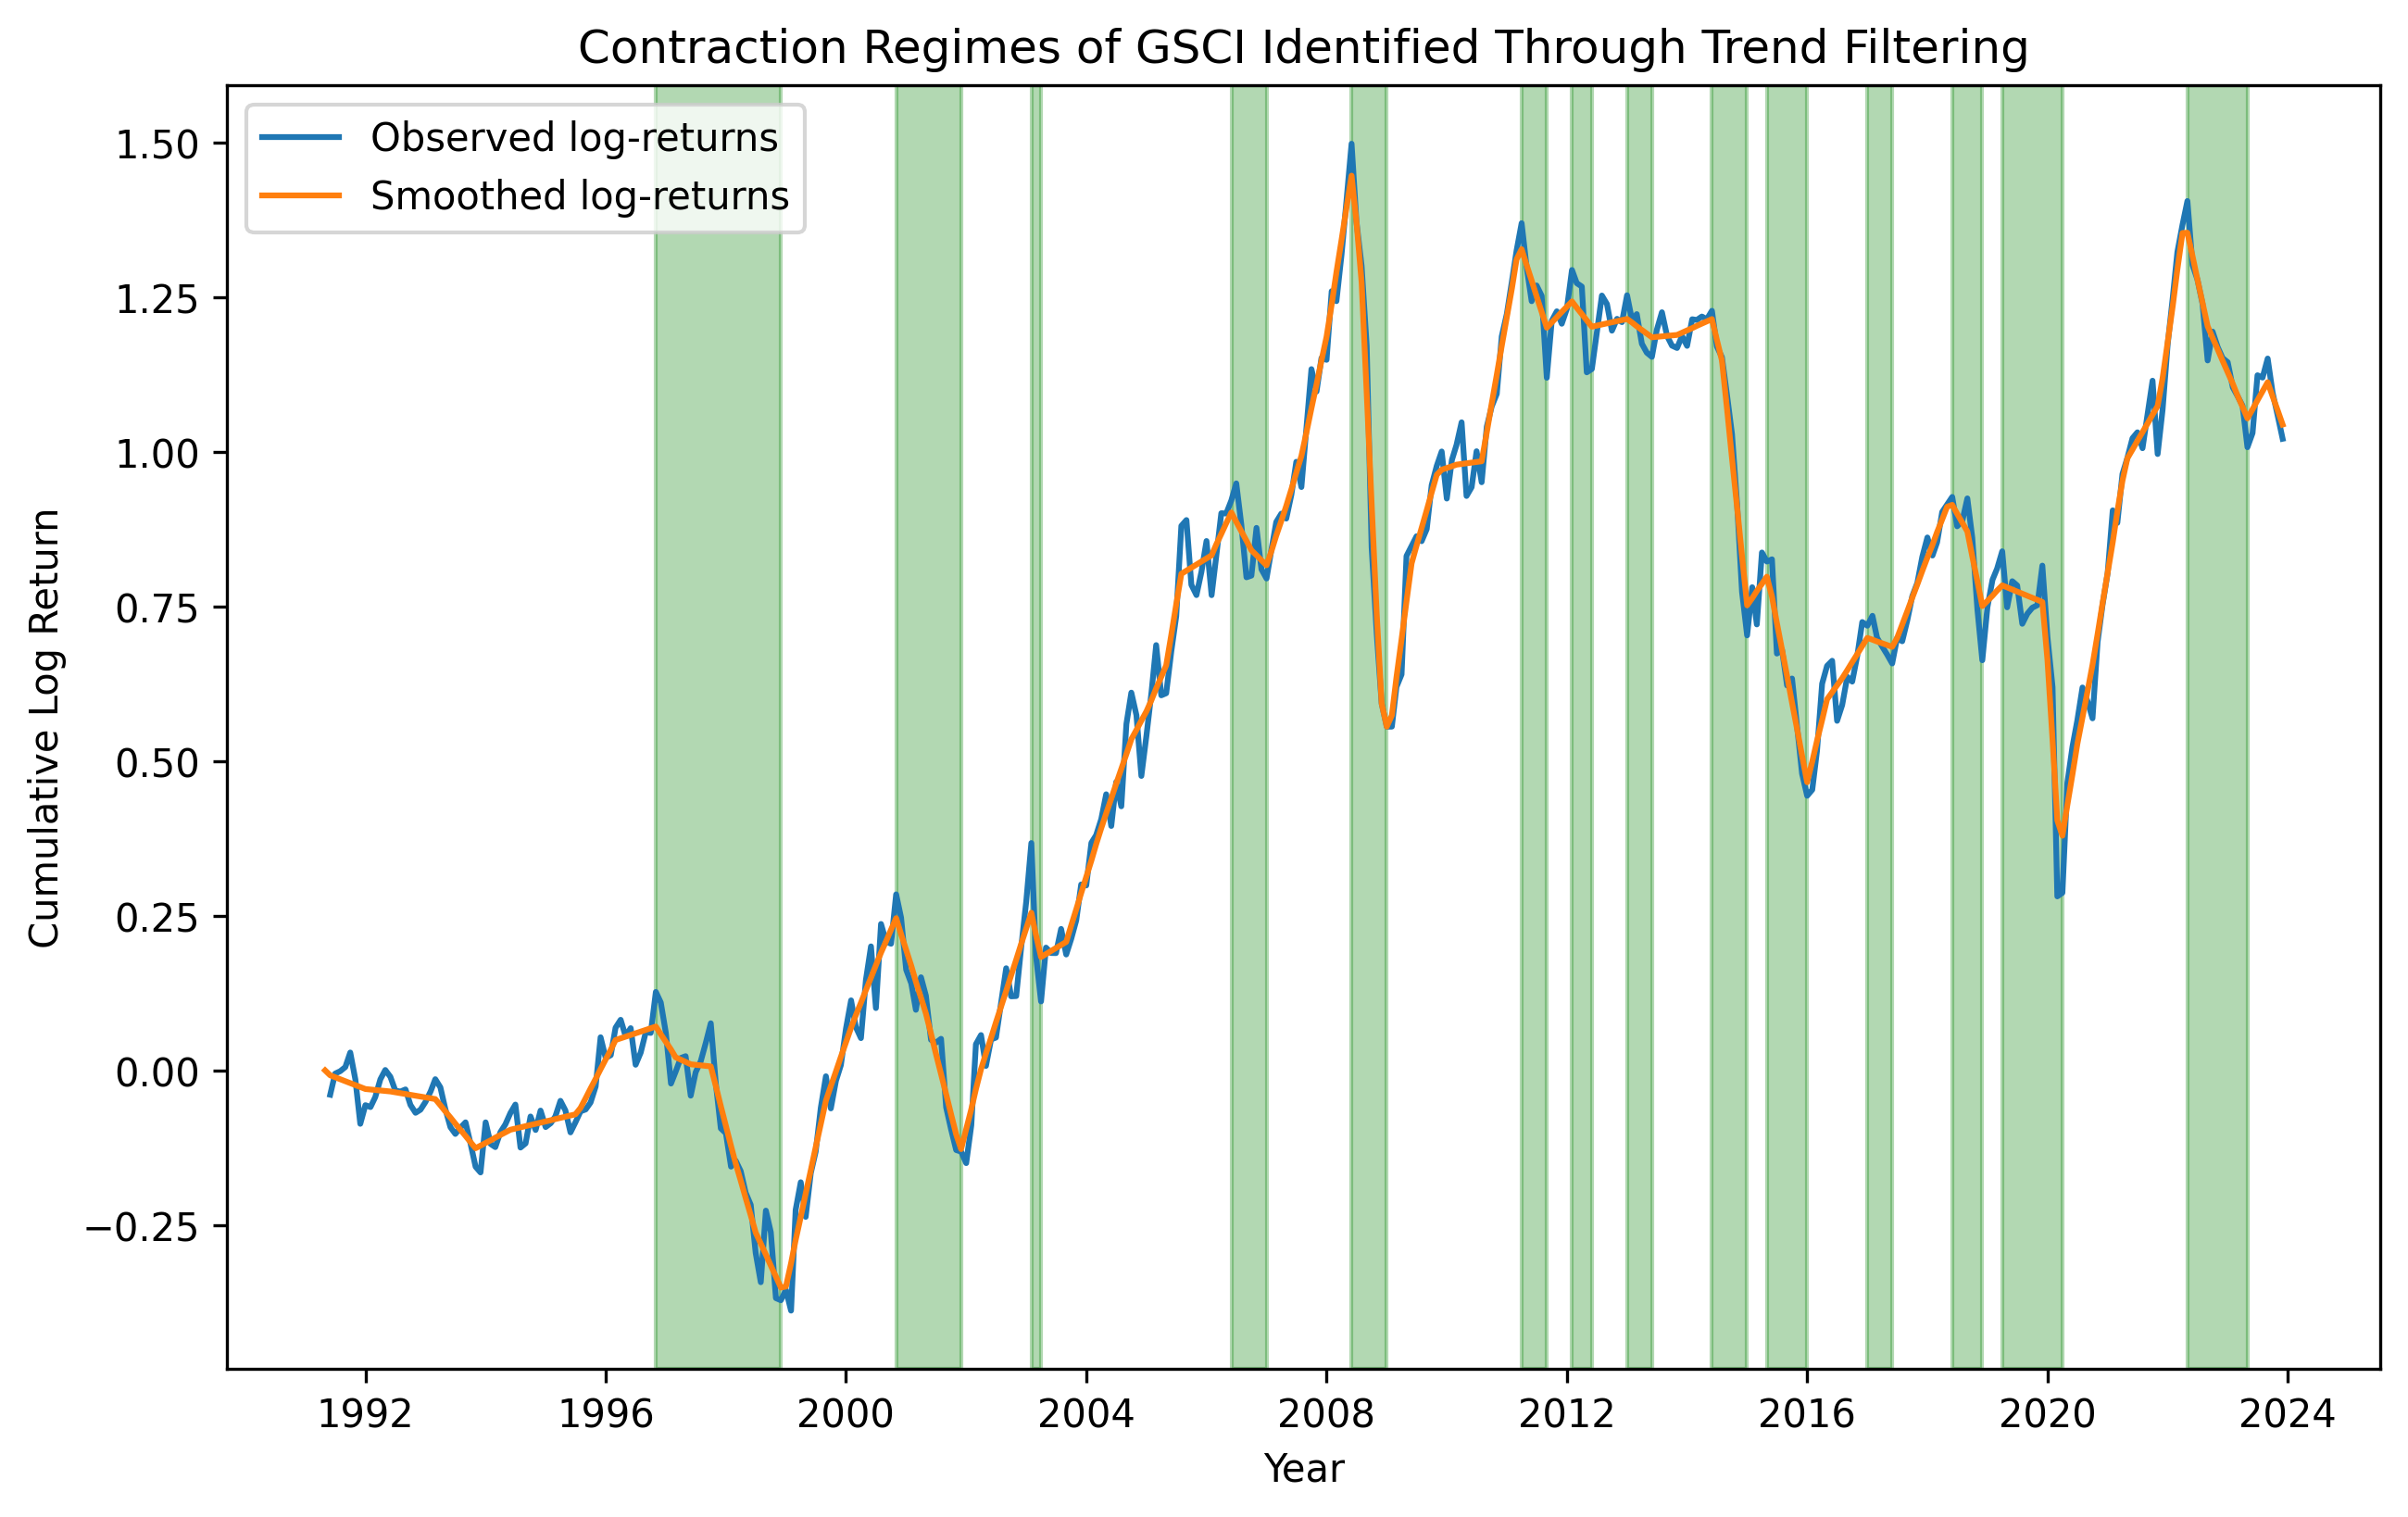

In [11]:
spgsci_regime.plot_best_lambda('GSCI', tuning=False)

In [12]:
spgsci_regime.plot_lambdas

TypeError: plot_lambdas() missing 1 required positional argument: 'smoothed_prices_lamdas'

/Users/elliebae/Documents/Senior Thesis/senior-thesis-1/regime_detection_tf.py:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  smoothed_train = smoothed_prices[train_index]
/Users/elliebae/Documents/Senior Thesis/senior-thesis-1/regime-detection/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


best lambda 0.04
best lambda 0.04
best lambda 0.04
best lambda 0.04
best lambda 0.04
best lambda 0.04
best lambda 0.04
best lambda 0.04
I_n (213, 213)
D (211, 213)
lambda val 9.476393002395747


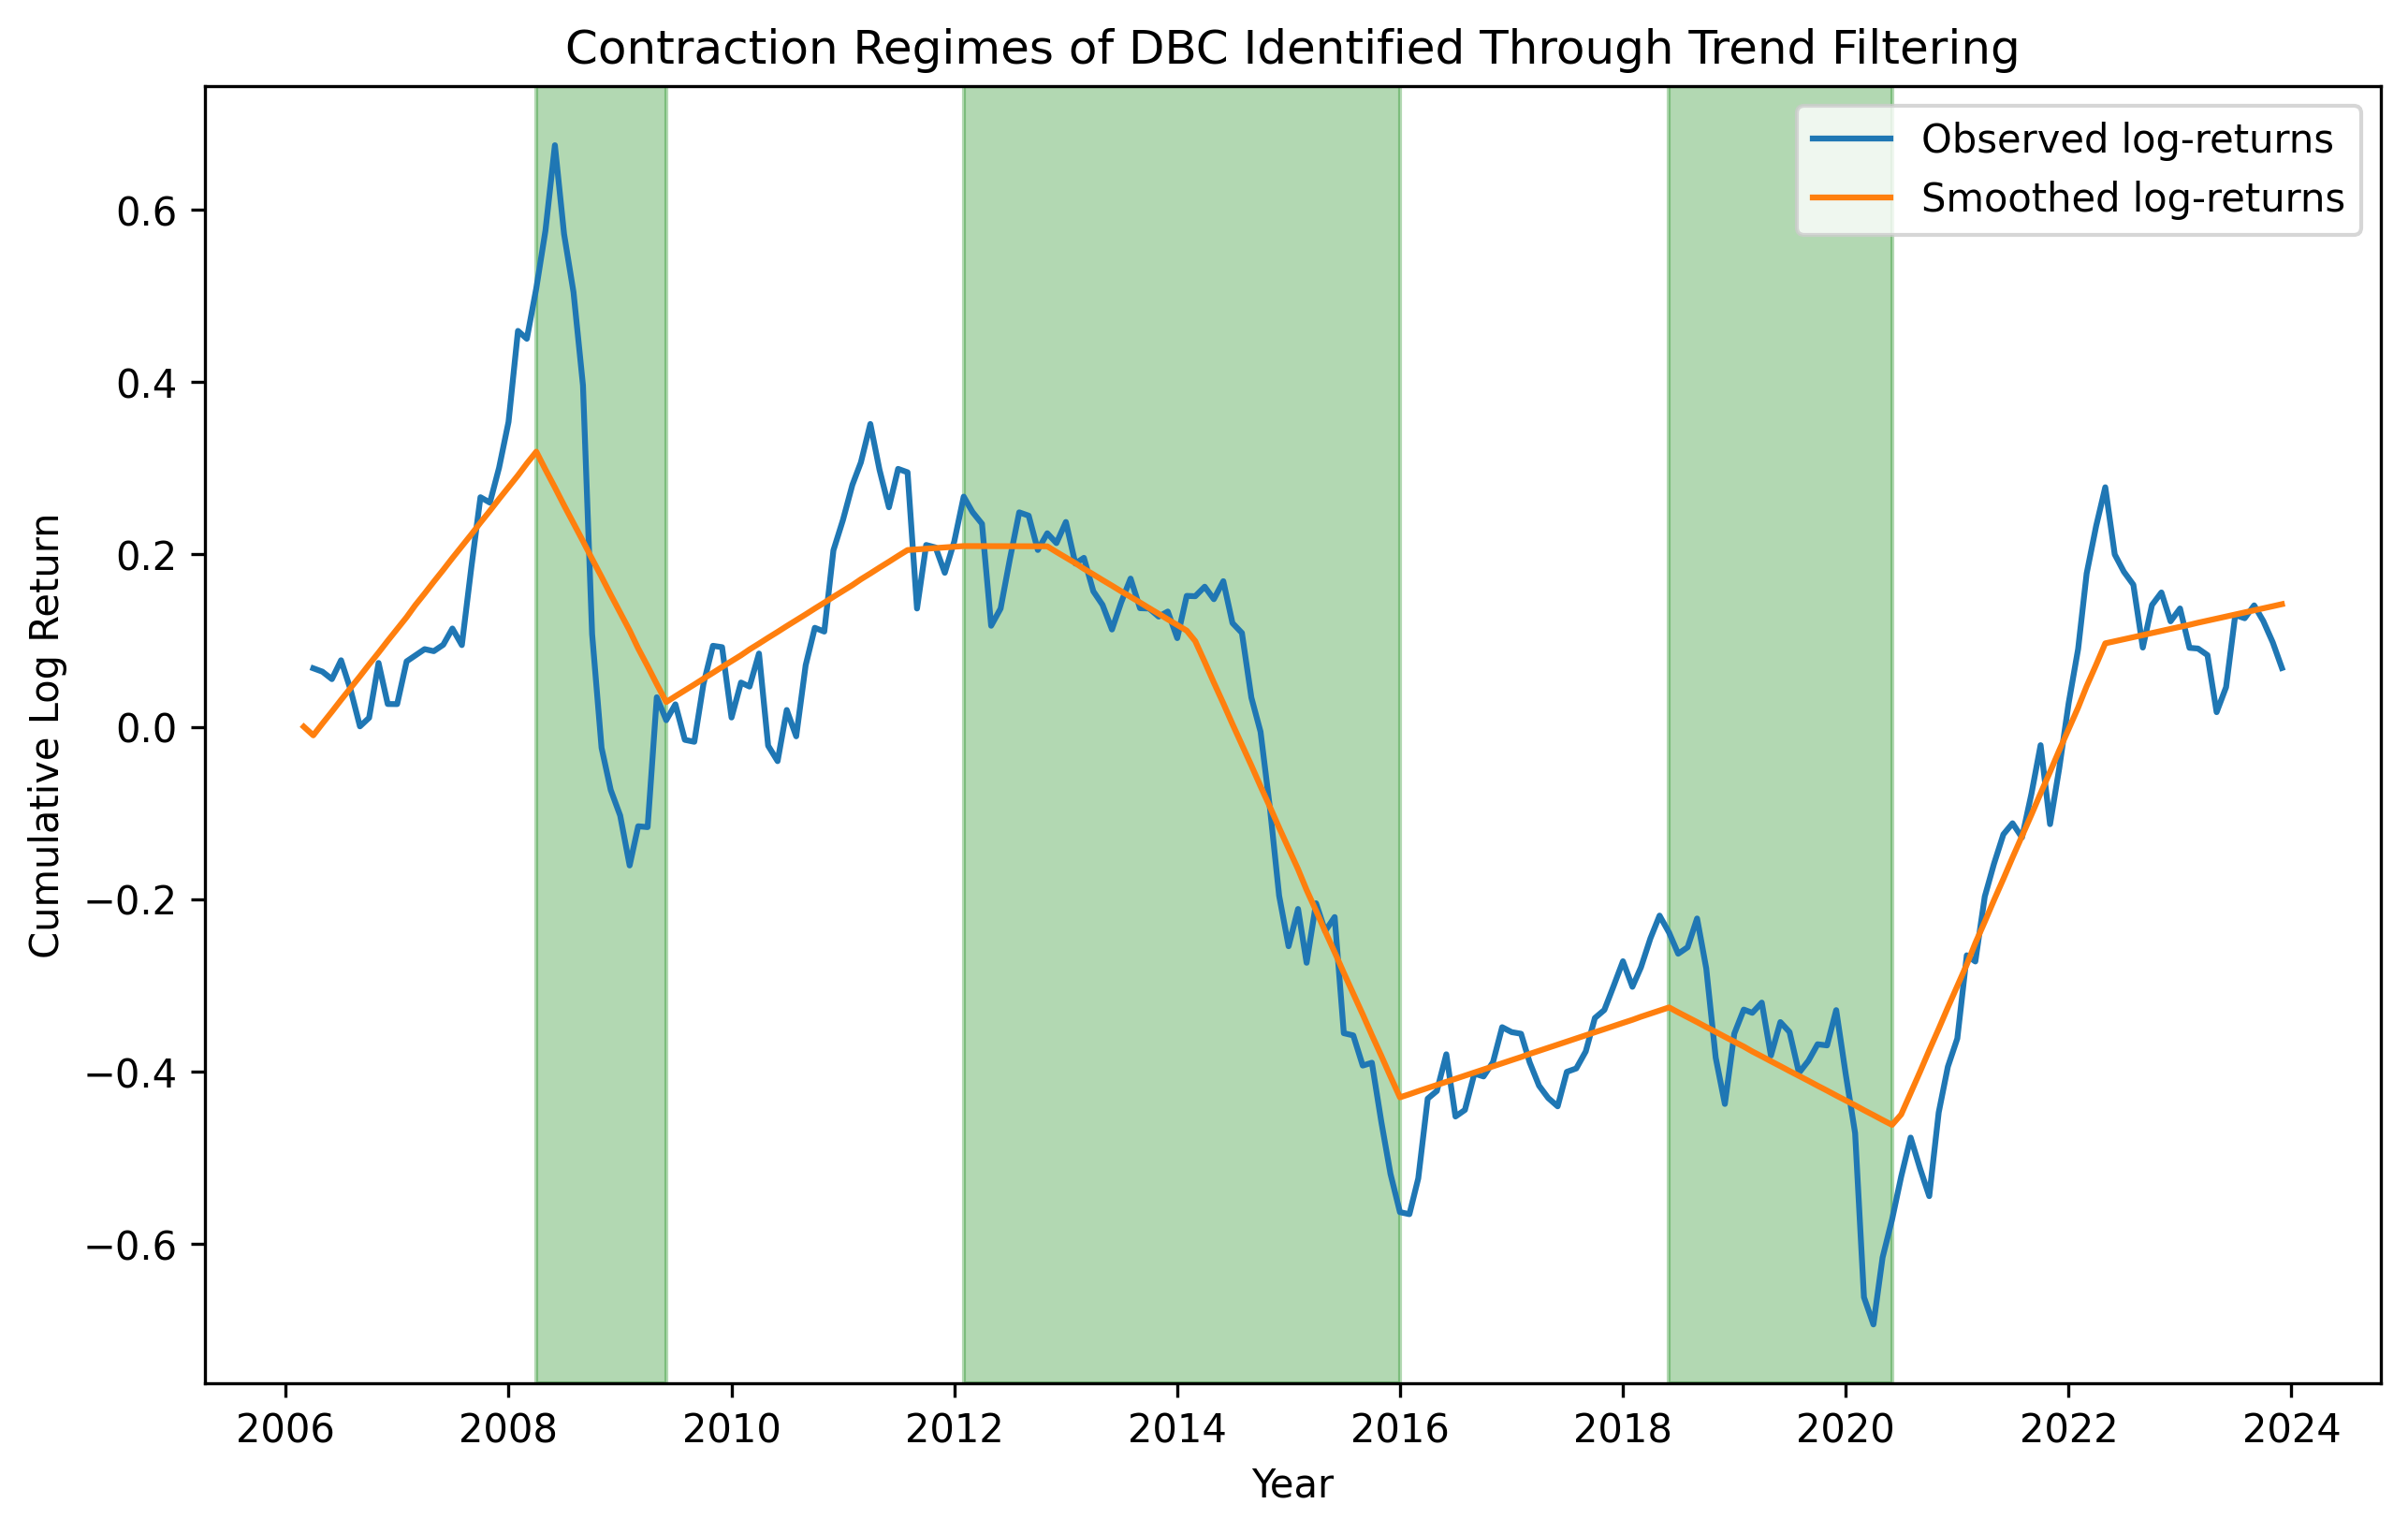

In [8]:
dbc_regime = regime_detection_tf(dbc, lamda_vals, sep_date)
dbc_df, dbc_regime_shifts = dbc_regime.detect_regime()
dbc_regime.plot_best_lambda()

In [ ]:
# Separate out-of-sample data
sep_date = '2016-02-05'
# Smooth the Log Prices with Trend Filtering
lamda_vals = [0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32]
spgsci_regime = regime_detection_tf(spgsci, lamda_vals, sep_date)

In [10]:
# regime_obj.plot_lambdas(smoothed_prices_lamdas)